# 设计一个简单的分析系统

1.使用tushare获取hs300指数数据并绘图

2.计算10日均线,40日均线,10日均线与40日均线差值并绘图

3.计算交易信号

4.策略运算结果与基准对比

In [3]:
import tushare as ts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

**1.使用tushare获取hs300指数数据并绘图**

In [4]:
#设置参数
spread=3
#获取数据
hs300=ts.get_hist_data('hs300')
hs300=hs300.sort_index()

In [26]:
hs300.index = list(map(lambda x: datetime.strptime(str(x),"%Y-%m-%d"), hs300.index))

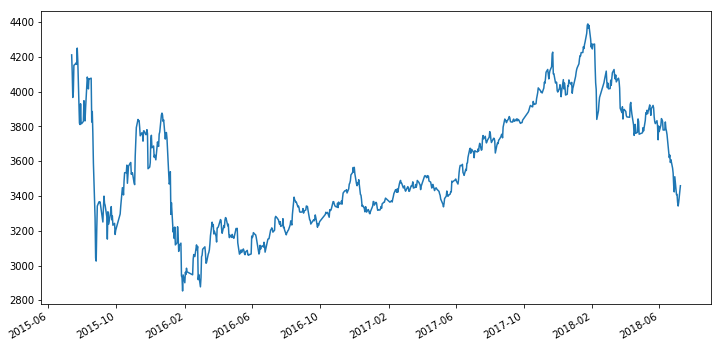

In [29]:
#显示沪深300三年走势
hs300['close'].plot(figsize=(12,6))
plt.show()

**2.计算10日均线,40日均线,10日均线与40日均线差值并绘图**

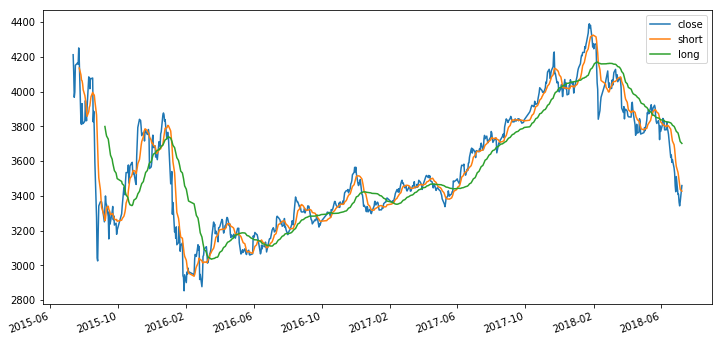

In [30]:
#使用numpy画均线
hs300['short']=np.round(hs300['close'].rolling(window=10,center=False).mean(),2)
hs300['long']=np.round(hs300['close'].rolling(window=40,center=False).mean(),2)
hs300['short-long']=hs300['short']-hs300['long']
#显示走势以及均线
hs300[['close','short','long']].plot(figsize=(12,6))
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()

**3.计算交易信号**

In [31]:
hs300['signal']=np.where(hs300['short-long']>spread,1,0)
hs300['signal']=np.where(hs300['short-long']<spread,-1,hs300['signal'])

In [33]:
hs300['signal'].tail()

2018-07-03   -1
2018-07-04   -1
2018-07-05   -1
2018-07-06   -1
2018-07-09   -1
Name: signal, dtype: int32

In [34]:
print(hs300['signal'].value_counts())

 1    401
-1    290
 0     39
Name: signal, dtype: int64


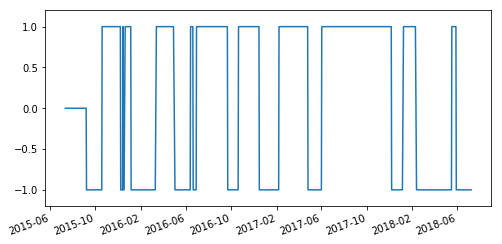

In [35]:
#显示交易信号
hs300['signal'].plot(figsize=(8,4))
plt.ylim([-1.2,1.2])
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()

**4.策略运算结果与基准对比**

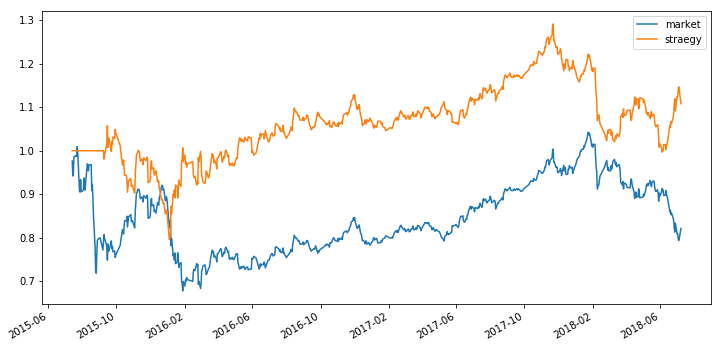

In [36]:
#显示资金曲线
hs300['market']=np.log(hs300['close']/hs300['close'].shift(1))
hs300['straegy']=hs300['signal'].shift(1)*hs300['market']
hs300[['market','straegy']].cumsum().apply(np.exp).plot(figsize=(12,6))
plt.show()